In [19]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import models
from keras import utils
from keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, shutil


In [2]:
image_size = (512, 512)

#Create a Pandas dataframe for training data for exploratory data analysis
df = pd.read_csv(r'../images/trainLabels.csv')
df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [3]:
#Total rows of data in our dataframe (-1 due to first row consisting of column headers)
print("Columns: ", len(df.columns), "- Rows: ", len(df.index))

Columns:  2 - Rows:  35126


In [4]:
#Check for any duplicated rows or null values
print(f"There are {df.duplicated().sum()} repeated rows")
print(df.isnull().sum())

There are 0 repeated rows
image    0
level    0
dtype: int64


[Text(0, 0, '25810'),
 Text(0, 0, '2443'),
 Text(0, 0, '5292'),
 Text(0, 0, '873'),
 Text(0, 0, '708')]

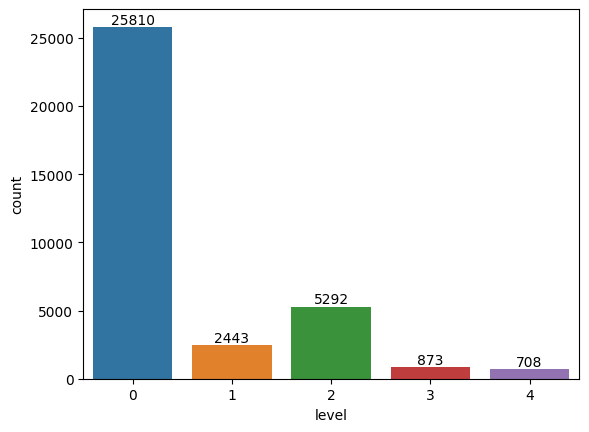

In [5]:
#Visualisation of quantity of images related to their grade of retinopathy
#We'll need to perform data augmentation as there is very low amount of images for each grade in comparison to clean images. 
distribution = sns.countplot(x=df['level'])
distribution.bar_label(distribution.containers[0])

In [6]:
base_dir = '../images/train'
test_dir = '../images/test'

#Make new directories for each retinopathy grade


grade_0_dir = os.path.join(base_dir, '0')
#os.mkdir(grade_0_dir)

grade_1_dir = os.path.join(base_dir, '1')
#os.mkdir(grade_1_dir)

grade_2_dir = os.path.join(base_dir, '2')
#os.mkdir(grade_2_dir)

grade_3_dir = os.path.join(base_dir, '3')
#os.mkdir(grade_3_dir)

grade_4_dir = os.path.join(base_dir, '4')
#os.mkdir(grade_4_dir)



In [7]:
#Move images from our main training folder and categorise into new folders
"""
for index, row in df.iterrows():
    shutil.move(f"../images/train/{row['image']}.jpeg", f"../images/train/{row['level']}/{row['image']}.jpeg")
"""

'\nfor index, row in df.iterrows():\n    shutil.move(f"../images/train/{row[\'image\']}.jpeg", f"../images/train/{row[\'level\']}/{row[\'image\']}.jpeg")\n'

In [8]:
#Due to the bias in image count, we are going to only use a maximum of 500 imgaes for each count before augmentation

balanced = os.path.join(base_dir, 'Balanced')
os.mkdir(balanced)

#Move first 500 images from the grade 0 folder
balanced_grade_0 = os.path.join(balanced, 'Balanced 0')
os.mkdir(balanced_grade_0)
dir = os.listdir(grade_0_dir)
images = [file for file in dir]

counter = 0

for img in images:
    if counter == 500:
        break
    
    src = os.path.join(grade_0_dir, img)
    dst = os.path.join(balanced_grade_0, img)
    shutil.move(src, dst)

    counter += 1

#Move first 500 images from the grade 1 folder

balanced_grade_1 = os.path.join(balanced, 'Balanced 1')
os.mkdir(balanced_grade_1)
dir = os.listdir(grade_1_dir)
images = [file for file in dir]

counter = 0

for img in images:
    if counter == 500:
        break
    
    src = os.path.join(grade_1_dir, img)
    dst = os.path.join(balanced_grade_1, img)
    shutil.move(src, dst)

    counter += 1


#Move first 500 images from the grade 2 folder

balanced_grade_2 = os.path.join(balanced, 'Balanced 2')
os.mkdir(balanced_grade_2)
dir = os.listdir(grade_2_dir)
images = [file for file in dir]

counter = 0

for img in images:
    if counter == 500:
        break
    
    src = os.path.join(grade_2_dir, img)
    dst = os.path.join(balanced_grade_2, img)
    shutil.move(src, dst)

    counter += 1


#Move first 500 images from the grade 3 folder

balanced_grade_3 = os.path.join(balanced, 'Balanced 3')
os.mkdir(balanced_grade_3)
dir = os.listdir(grade_3_dir)
images = [file for file in dir]

counter = 0

for img in images:
    if counter == 500:
        break
    
    src = os.path.join(grade_3_dir, img)
    dst = os.path.join(balanced_grade_3, img)
    shutil.move(src, dst)

    counter += 1

#Move first 500 images from the grade 4 folder

balanced_grade_4 = os.path.join(balanced, 'Balanced 4')
os.mkdir(balanced_grade_4)
dir = os.listdir(grade_4_dir)
images = [file for file in dir]

counter = 0

for img in images:
    if counter == 500:
        break
    
    src = os.path.join(grade_4_dir, img)
    dst = os.path.join(balanced_grade_4, img)
    shutil.move(src, dst)

    counter += 1


FileExistsError: [WinError 183] Cannot create a file when that file already exists: '../images/train\\Balanced'

In [9]:
train_ds = utils.image_dataset_from_directory(
    balanced,
    labels="inferred",
    label_mode='int',
    color_mode='grayscale',
    batch_size=42,
    image_size=image_size,
    shuffle=True,
    seed=32,
    validation_split=0.2,
    subset='training',
    crop_to_aspect_ratio=True
)

test_ds = utils.image_dataset_from_directory(
    test_dir,
    labels=None,
    label_mode=None,
    color_mode='grayscale',
    batch_size=42,
    image_size=image_size,
    shuffle=True,
    seed=32,
    crop_to_aspect_ratio=True
)

validation_ds = utils.image_dataset_from_directory(
    balanced,
    labels="inferred",
    label_mode='int',
    color_mode='grayscale',
    batch_size=42,
    image_size=image_size,
    shuffle=True,
    seed=32,
    validation_split=0.2,
    subset='validation',
    crop_to_aspect_ratio=True
)

Found 2500 files belonging to 5 classes.
Using 2000 files for training.
Found 53571 files belonging to 1 classes.
Found 2500 files belonging to 5 classes.
Using 500 files for validation.


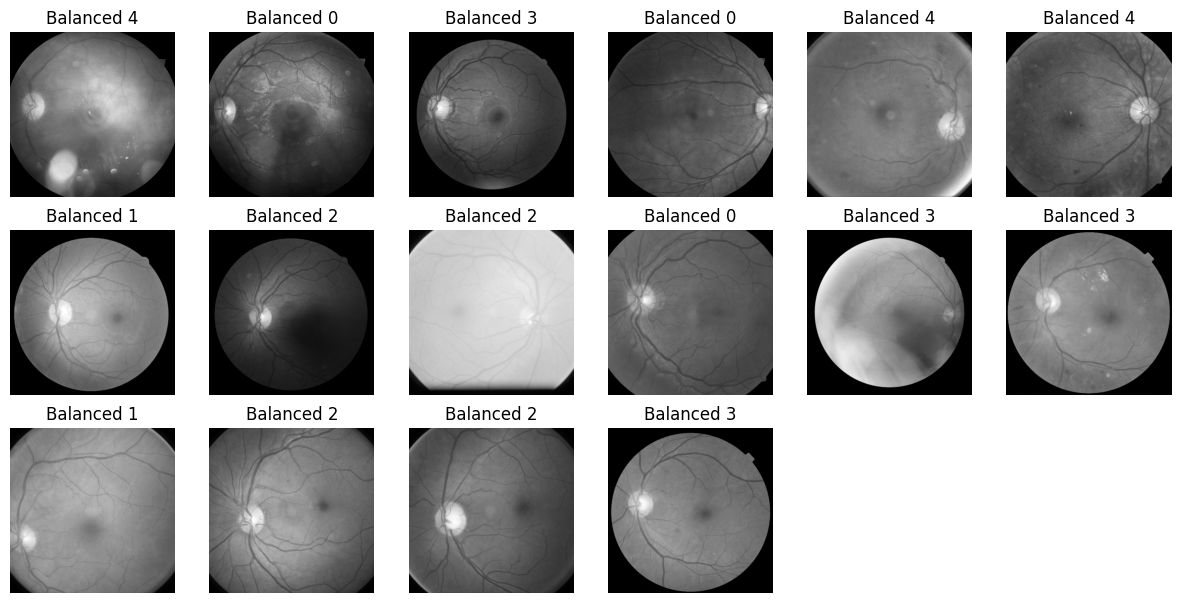

In [10]:
#Display a sample of images from our dataset
plt.figure(figsize=(15, 15))
classes = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(16):
        plot = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(classes[labels[i]])
        plt.axis('off')


In [11]:
#Due to reducing image count for balance, we will augment our images to generate a larger dataset. 
train_datagen = ImageDataGenerator(
    horizontal_flip=True, #Dataset isn't standardised (i.e eye can be flipped either way) so our augment should match this as well
    rescale=1./255,
    validation_split=0.2
)


train_gen = train_datagen.flow_from_directory(
    balanced,
    target_size=image_size,
    batch_size=16,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_directory(
    balanced,
    target_size=image_size,
    batch_size=16,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [25]:
adam = Adam()
earlystop = EarlyStopping(monitor='acc', patience=5)

#Define the model
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 255, 255, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 126, 126, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 62, 62, 128)     

In [26]:
history = model.fit(train_gen, epochs=50, verbose=1, validation_data=valid_gen, callbacks=[earlystop])

Epoch 1/50
125/125 [==============================] - 144s 1s/step - loss: 1.6885 - acc: 0.1830 - val_loss: 1.6095 - val_acc: 0.2000
Epoch 2/50
125/125 [==============================] - 128s 1s/step - loss: 1.6097 - acc: 0.1760 - val_loss: 1.6094 - val_acc: 0.2000
Epoch 3/50
125/125 [==============================] - 130s 1s/step - loss: 1.6095 - acc: 0.1925 - val_loss: 1.6094 - val_acc: 0.2000
Epoch 4/50
125/125 [==============================] - 123s 982ms/step - loss: 1.6097 - acc: 0.1825 - val_loss: 1.6094 - val_acc: 0.2000
Epoch 5/50
125/125 [==============================] - 125s 997ms/step - loss: 1.6097 - acc: 0.1815 - val_loss: 1.6094 - val_acc: 0.2000
Epoch 6/50
125/125 [==============================] - 127s 1s/step - loss: 1.6097 - acc: 0.1940 - val_loss: 1.6094 - val_acc: 0.2000
Epoch 7/50
125/125 [==============================] - 128s 1s/step - loss: 1.6097 - acc: 0.1905 - val_loss: 1.6094 - val_acc: 0.2000
Epoch 8/50
125/125 [==============================] - 129s 1s/s

Using our Early Stoppage callback, we stopped seeing improvement on the 11th epoch, capping at 19.60% accuracy. 

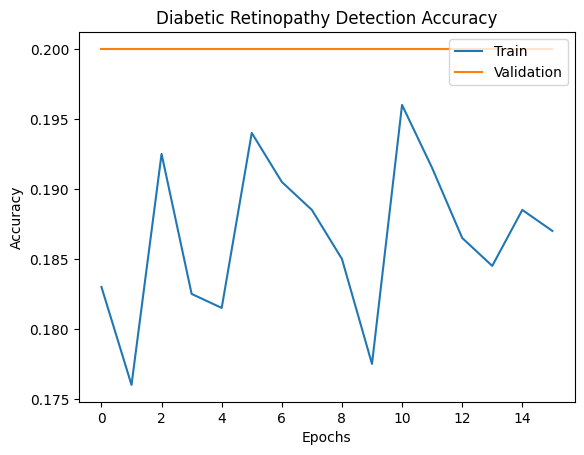

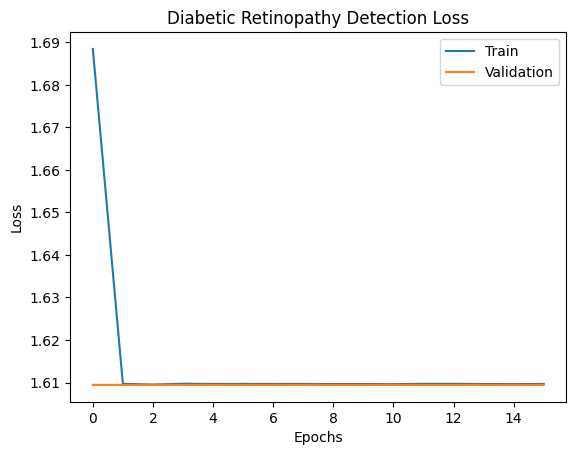

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Diabetic Retinopathy Detection Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Diabetic Retinopathy Detection Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

VGG16:

In [14]:
from keras.applications import VGG16

VGGModel = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

VGGModel.summary()


58889256/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                              